<a href="https://colab.research.google.com/github/MasoudMoeini/Image-blur-detection/blob/main/identifier_pred_show.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib . pyplot as plt
from PIL import Image
from numpy import asarray
from keras.models import load_model
from PIL import Image
images = np.load('train.npy')

In [64]:
images.shape

(1000, 224, 224, 3)

In [65]:
#image = Image.fromarray(images[70],'RGB')
#plt.imshow(image)
#plt.axis("off")
images=images[0:200]
model = load_model("encoderdecoder_model.h5")

In [66]:
predictions=[]
batch_size=10
num_batches=len(images)//batch_size
for i in range(num_batches):
  img=images[i*batch_size : (i+1)*batch_size]
  img = img.astype(np.float32)/ 255.0
  pred = model.predict(img)
  predictions.append(pred)

In [70]:
predictions=np.reshape(predictions,(len(images),224,224,3))

In [71]:
len(predictions)

200

In [72]:
predictions[0].shape

(224, 224, 3)

In [44]:
'''
img = img.astype(np.float32)/ 255.0
#img = np.expand_dims(img, axis=0)
model = load_model("encoderdecoder_model.h5")
'''

In [45]:
#pred = model.predict(img)



In [47]:
#pred[0].shape

(224, 224, 3)

(-0.5, 223.5, 223.5, -0.5)

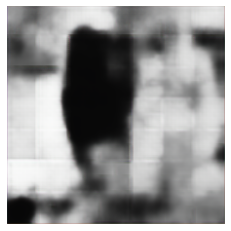

In [73]:
label= (predictions[1]*255.0).astype(np.uint8)
plt.imshow(label)
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

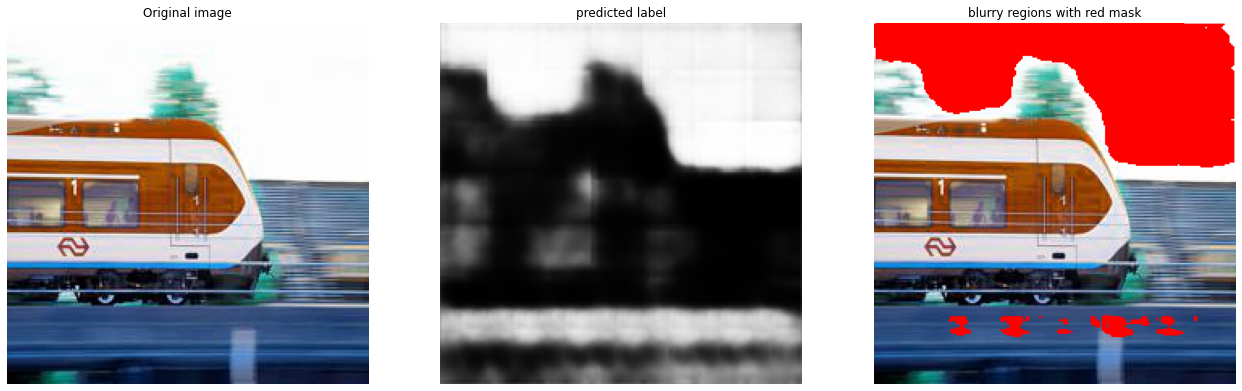

In [74]:
#main_picture = Image.open("motion0073_shi.jpg")
main_picture = Image.fromarray(images[177])
label_picture = Image.fromarray((predictions[177]*255.0).astype(np.uint8))
final_image = main_picture.copy()
label_to_gray = label_picture.convert('L')
rescale_label=label_to_gray.copy()
rescale_label= np.array(rescale_label).astype(np.float32)/255.0

# Get the size of the image
width, height = label_to_gray.size

# Process every pixel
for x in range(0, width - 1):
    for y in range(0, height - 1):
        current_color = final_image.getpixel((x,y))
        if (label_to_gray.getpixel((x,y)))>210:
            final_image.putpixel((x,y),(255,0,0) )
            
       ####################################################################
       # Do your logic here and create a new (R,G,B) tuple called new_color
       ####################################################################
       #picture.putpixel( (x,y), new_color)             
plt.figure(figsize=(22,22))
ax = plt.subplot(1,3,1)
main_picture.show()
plt.title('Original image')  
plt.imshow(main_picture, cmap='binary')
plt.axis("off")

ax = plt.subplot(1,3,2)
plt.title('predicted label')  
plt.imshow(rescale_label, cmap='gray')
plt.axis("off")

ax = plt.subplot(1,3,3)
plt.title('blurry regions with red mask') 
plt.imshow(final_image, cmap='binary')
plt.axis("off")
